# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score


In [8]:
credito = pd.read_csv('credito_mod.csv')

In [31]:
y = credito['mau']

X = credito.drop(['mau', 'Unnamed: 0'], axis=1)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [35]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train, y_train)

plt.figure(figsize=(250,100))
plot_tree(clf, filled=True, class_names=['aprovados', 'reprovados'], feature_names=X.columns.tolist());

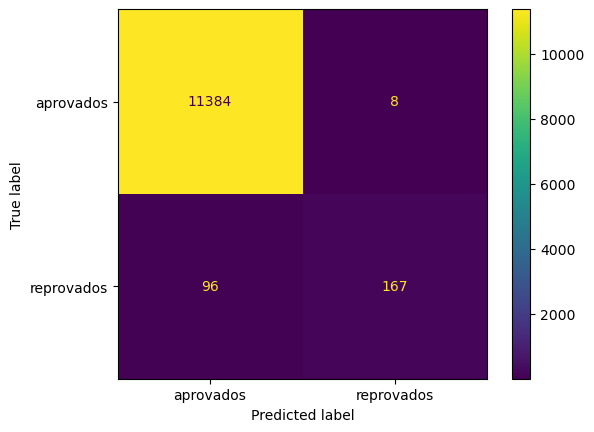

In [38]:
#plot_confusion_matrix() - não existe mais, talvez seria bom colocar um update nas aulas do módulo
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=['aprovados', 'reprovados'])

In [40]:
y_hat_train = clf.predict(X_train)
accuracy_score(y_train, y_hat_train)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [43]:
clf = clf.fit(X_test, y_test)


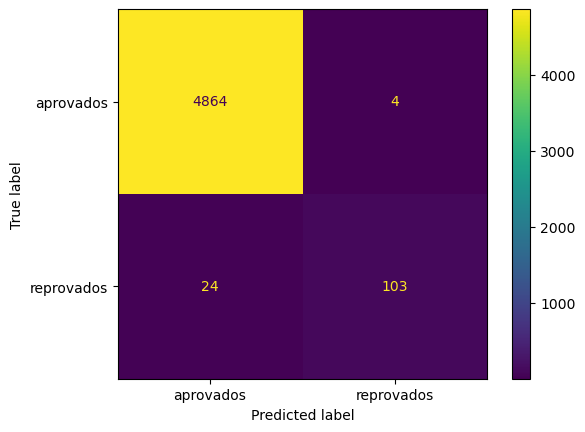

In [44]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['aprovados', 'reprovados'])

In [45]:
y_hat_test = clf.predict(X_test)
accuracy_score(y_test, y_hat_test)

0.9943943943943944

In [49]:
#Nova árvore

clf2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf2 = clf2.fit(X_train, y_train)

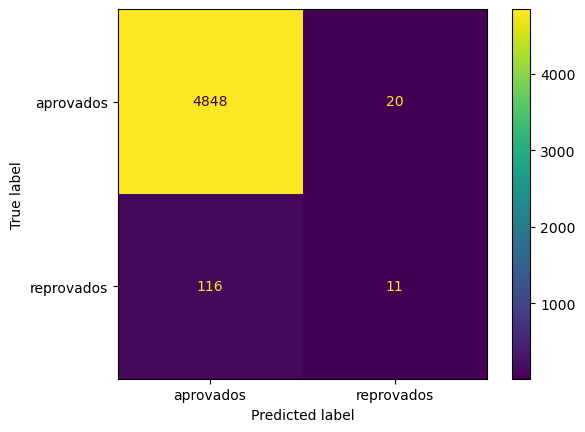

In [48]:
ConfusionMatrixDisplay.from_estimator(clf2, X_test, y_test, display_labels=['aprovados', 'reprovados'])

In [50]:
y_hat_test = clf2.predict(X_test)
accuracy_score(y_test, y_hat_test)

0.9727727727727727

In [51]:
#reprovados: 
(116+11)/(4848+20+116+11)

0.025425425425425426

In [60]:
# 3% foram classificados como "maus" (reprovados)


In [61]:
# se todos 'y' preditos fossem bons (False)
y_hat_test = (y_hat_test*0).astype(bool)
accuracy_score(y_test, y_hat_test)

0.9745745745745745

In [ ]:
# a acurácia seria praticamente a mesma (até um pouquinho maior).